## Least square

#### Take-aways

- Least square
  - What we can do with it.
  - Why do we care?
  - Why it works.
  - How to find them.

### Overview



#### Settings/Notation

Common settings

| symbol | setting |
|---|---|
| $m$ | a positive integer; number of observations; number of equations |
| $n$ | a positive integer; number of parameters; number of unknowns |
| $A$ | full rank $m$-by-$n$ matrix with $m \gg n$ (tall matrix) |
| $b$ | (column) vector of length $m$ |
| $x$ | (column) vector of length $n$ |

$$
\| x \| = \| x \|_2=\sqrt{x_1^2 +\cdots + x_n^2} \quad \text{(2-norm)}
$$ 



**Clicker question 1**

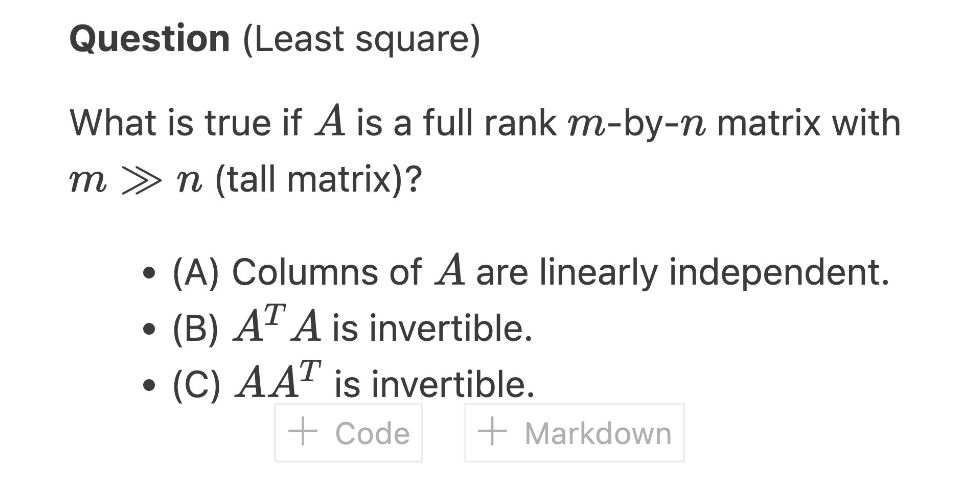

ANS: A, B


#### Problem of interest


**Problem** (Least square)

> Given an over-determined (or inconsistent) system $Ax=b$, find the "best" $x$.


#### Why do we care?


- The least square method gives a new way of answering interpolation problem.
- The least square method gives answers to the following situations.
  - The "equality" conditions that $x$ should satisfy are only within some margin of errors (Sauer 2017)
  - Using aggregated data (hence too many conditions to satisfy) to determine a better solution. 
    - E.g.: Measurements of celestial bodies. In fact, predicting the orbit of an ateroid Ceres was at the heart of the invention of the method. ([Wikipedia page on history of least square](https://en.wikipedia.org/wiki/Least_squares#History))
- The least square method inspires many other statistical methods and signal processing.
  - Ridge regression, also known as Tikhonov regularization (LS + $\ell^2$ penalty)
  - LASSO (LS + $\ell^1$ penalty)
  - Elastic net (LS + $\ell^1$ penalty + $\ell^2$ penalty)

| | |
|---|---|
| ![determine an elliptical orbit using least square](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/X33-ellips-1.svg/1920px-X33-ellips-1.svg.png) <br> Figure: determine an elliptical orbit using least square (Wikipedia) | ![fitting parabola model with many data](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Linear_least_squares2.svg/1024px-Linear_least_squares2.svg.png) <br> Figure: fitting parabola model with many data (Wikipedia) |

### What we can do



#### Fitting data by least square

1. Choose a model $\longrightarrow$ dimension and meaning of $x$
2. Force the model to fit the data $\longrightarrow$ $Ax=b$ 
3. Solve the normal equation $\longrightarrow$ compute $x$ such that $A^T Ax = A^T b$
4. Diagnostics $\longrightarrow$ plots and statistics

### Main idea of least square method

#### Projection

**Example** 

Find "the best" solution to 
$$
\begin{aligned}
& x_1+x_2=2 \\
& x_1-x_2=1 \\
& x_1+x_2=3
\end{aligned} 
\Longleftrightarrow
\left[\begin{array}{rr}
1 & 1 \\
1 & -1 \\
1 & 1
\end{array}\right]\left[\begin{array}{l}
x_1 \\
x_2
\end{array}\right]=\left[\begin{array}{l}
2 \\
1 \\
3
\end{array}\right]
$$

**Observation 1**

- Change the perspective: row $\longleftrightarrow$ column.
  - Matrix muliplication $\Longleftrightarrow$ Linear combination of column vectors

$$
x_1\left[\begin{array}{l}
1 \\
1 \\
1
\end{array}\right]+x_2\left[\begin{array}{r}
1 \\
-1 \\
1
\end{array}\right]=\left[\begin{array}{l}
2 \\
1 \\
3
\end{array}\right]
$$

If $b$ were in the column space (i.e., some linear combination of columns equals $b$), it would have been solvable. But $b$ is outside the column space.

**Observation 2**

"The best" candidate for $x$ is the one that gives the **projection** of $b$ onto the column space.

- Projection is always related to smallest distance in some metric.
  - Here, the metric is Euclidean distance, i.e., 2-norm.
- Now, resulting the projected vector is a possible task while the original r.h.s. vector was impossible.

![geometric intuition behind LS](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Linear_least_squares_geometric_interpretation.png/543px-Linear_least_squares_geometric_interpretation.png)

Figure: Geometric intuition behind Least Square method (Wikipedia)

Notation adjustments

- $\beta \gets x$
- $A \gets X$
- $y \gets b$

#### Normal equation

Let $\bar x$ be the vector of unknowns that gives the projection of $b$. Then, we have, from the picture,

$$
(b-A \bar{x}) \perp \underbrace{\left\{A c \mid c \in R^n\right\}}_{\text{column space}}
$$

which is equivalent to

$$
\underbrace{(A c)^T}_{\text{lin. comb.\\col's}}(b-A \bar{x})=0 \text { for all } c \text { in } R^n
$$

which is equivalent to

$$
c^T A^T(b-A \bar{x})=0 \text { for all } c \text { in } R^n.
$$

This leads to the normal equation because $\vec 0 \in R^n$ is the only vector that is orthongonal to arbitrary vectors $c$. 


**Normal equation**

$$
A^T A \bar{x}=A^T b
$$


**Fact**

- $\bar x = \mathrm{argmin}_{x\in\mathbb{R}^n} \| b - Ax \|_2$. In other words, the least square solution minimizes the 2-norm of the residual. 

#### Diagnostics

| Terminology | Definition |
|---|---|
| Residual |  $$r=b-A \bar x=(r_1, \cdots, r_m)$$ |
| Squared error (SE) | $$r_1^2+\cdots+r_m^2$$ |
| Mean squared error (MSE) |  $$\mathrm{SE} / m= \left(r_1^2+\cdots+r_m^2\right) / m$$ |
| root mean squared error (RMSE) |  $$\sqrt{MSE}=\sqrt{\left(r_1^2+\cdots+r_m^2\right) / m}$$ |


**Remark** (Residual and backward errors)

- The above quantities are all some measure of **backward** errors $b-A \bar x$, not the real (i.e., forward) errors $x-\bar x$. (It seems that the nomenclature used in statistics and mathematics communities are different.) 

**Example** 

Find "the best" solution to 
$$
\begin{aligned}
& x_1+x_2=2 \\
& x_1-x_2=1 \\
& x_1+x_2=3
\end{aligned} 
\Longleftrightarrow
\left[\begin{array}{rr}
1 & 1 \\
1 & -1 \\
1 & 1
\end{array}\right]\left[\begin{array}{l}
x_1 \\
x_2
\end{array}\right]=\left[\begin{array}{l}
2 \\
1 \\
3
\end{array}\right]
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# System of linear equations
A = np.array([[1, 1], [1, -1], [1, 1]], dtype=np.float64)
b = np.array([2, 1, 3], dtype=np.float64)

# naively try to solve the system
# x = np.linalg.solve(A, b)

# solve normal equation
x = np.linalg.solve(A.T @ A, A.T @ b)

print(f"{'x':<10}{': '}{x}")
print(f"{'residual':<10}{': '}{b - A @ x}")
print(f"Dot prodoct of col1 and residual: {A[:,0].T @ (b - A @ x)}")
print(f"Dot prodoct of col2 and residual: {A[:,1].T @ (b - A @ x)}")


#### Computation

**Example** 

Find the best line for the four data points (−1, 1), (0, 0),
(1,0),(2,−2).

1. Decide a model
   - linear ($c_1 + c_2 t$)
2. Force the model to fit data: Write $Ax=b$.
   - Be clear about settings.
3. Solve normal equation

**Settings/Notations** (A subtask in Step 2)

- Given
  - Generic least square $Ax=b$
  - Our problem involvs
    - $c=[c_1, c_2]$,
    - $(x_i, y_i)$ for $1\le i \le 4$, 
    - $t$

1. Write out several equations by imposing conditions.
2. Match the roles of symbols.

- Settings

| Generic LS | Our problem | Shape (math-oriented, not Python) |
|---|---|---|
| $x$ |  $c=[c_1, c_2]$ <br> (Unknown/Solution vector) | $n\times 1$ ($n=2$) |
| $A$ | $x_i^0$, $x_i^1$, $x_i^2$ <br> (coefficents matrix) | $m\times n$ ($m=4$, $n=2$) | 
| $b$ | $y_i$ <br> (r.h.s. vector) | $m\times 1$ ($m=4$) |

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# data points
data = np.array([[-1, 1], [0, 0], [1,0], [2, -2]], dtype=np.float64)

# number of data points/observations
m = data.shape[0]

# vector of unknowns (model 1)
n = 2
c = np.zeros(n)

# matrix of least squares (model 1)
A = np.zeros((m, n))
ones = np.ones(m)
A = np.column_stack((ones, data[:, 0]))

# vector of observations
b = data[:, 1]

# least squares solution (model 1)
c = np.linalg.solve(A.T @ A, A.T @ b)

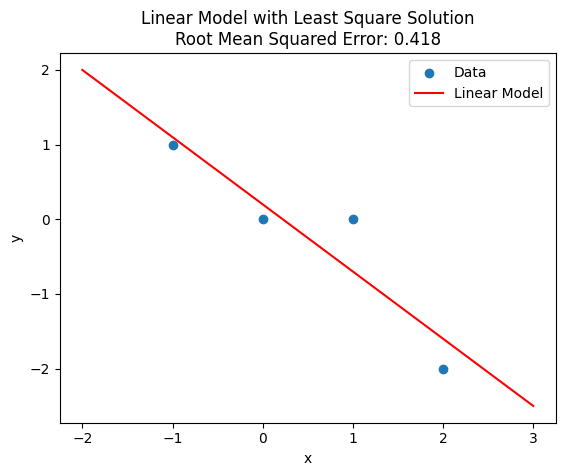

In [12]:
# AI usage: initial plotting block is doen with copilot

# Calculate the predicted values
y_pred = c[0] + c[1] * data[:, 0]

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((data[:, 1] - y_pred)**2))

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], label='Data')

# Plot the linear model
x = np.linspace(-2, 3, 100)
y = c[0] + c[1] * x
plt.plot(x, y, color='red', label='Linear Model')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Linear Model with Least Square Solution\nRoot Mean Squared Error: {rmse:.3g}')

# Show legend
plt.legend()

# Show the plot
plt.show()


### What to be careful of

#### Conditioning of normal equation

**Remark**

- The condition number $\mathrm{cond}(A^T A)$ is approximately the square of the original $\mathrm{cond}(A)$ (Sauer (2017) p. 204)

**Example** (ill-conditioned least square problem) Sauer 2017)

Let $x_0=2.0, x_2=2.2, x_3=2.4, \ldots, x_{10}=4.0$ be equally spaced points in $[2,4]$, and set $y_i=1+x_i+x_i^2+x_i^3+x_i^4+x_i^5+x_i^6+x_i^7$ for $0 \leq i \leq 10$. Use the normal equations to find the least squares polynomial $P(x)=c_1+c_2 x+\cdots+c_8 x^7$ fitting the $\left(x_i, y_i\right)$.

1. Choose a model $\longrightarrow$ dimension and meaning of $c$

Find best solution among the following (model) with $c=(c_0, \cdots, c_7)\in\mathbb{R}^8$

$$
P(x)=c_0+c_1 x+\cdots+c_7 x^7
$$

2. Force the model to fit the data $\longrightarrow$ $Ac=y$ 

$$
\left[\begin{array}{ccccc}
1 & x_0 & x_0^2 & \cdots & x_0^7 \\
1 & x_1 & x_1^2 & \cdots & x_1^7 \\
\vdots & \vdots & \vdots & & \vdots \\
1 & x_{10} & x_{10}^2 & \cdots & x_{10}^7
\end{array}\right]\left[\begin{array}{c}
c_0 \\
c_1 \\
\vdots \\
c_7
\end{array}\right]=\left[\begin{array}{c}
y_0 \\
y_1 \\
\vdots \\
y_{10}
\end{array}\right]
$$

where $x_0=2.0, x_2=2.2, x_3=2.4, \ldots, x_{10}=4.0$ and 

$$
y_i=1+x_i+x_i^2+x_i^3+x_i^4+x_i^5+x_i^6+x_i^7 \quad (i\in\{0,1,\cdots,10\})
$$


3. Solve the normal equation $\longrightarrow$ compute $x$ such that $A^T Ax = A^T b$

Use package

4. Diagnostics $\longrightarrow$ plots and statistics

Compare with the true solution since it is known in this case.

In [ ]:
import numpy as np
from internallib import poly_eval

# problem parameters
# Suggestions: To check sanity, set n = 2, 3, 4, 
#   Things get wild soon after n = 5
n = 8       # number of unknowns

# right-hand side vector
x = np.linspace(2., 4., 11)
c_true = np.ones(n)
y = poly_eval(c_true, x)

# matrix
pow = np.arange(n)
# A = x[:, np.newaxis] ** pow       # broadcasting in effect
A = x.reshape(-1, 1) ** pow         # equivalent to the previous line

# vector of unknowns
c = np.zeros(n)

# least squares solution (model 1 and 2)
c = np.linalg.solve(A.T @ A, A.T @ y)

In [ ]:
print(f"{'c_true':<10}{': '}{c_true}")
print(f"{'c':<10}{': '}{c}")
print(f"{'y':<10}{': '}{y}")
print(f"{'x':<10}{': '}{x}")


**Remark** 

- This motivates QR factorization, which finds the least square solution with better conditioning. 

### Survey of Model

**Example** (revisited)

Find the best best **parabola** for the four data points (−1, 1), (0, 0),
(1,0),(2,−2).

1. Decide a model
   - linear ($c_1 + c_2 t$)
   - **parabola** ($c_1 + c_2 t + c_3 t^2$)
2. Force the model to fit data: Write $Ax=b$.
   - Be clear about settings.
3. Solve normal equation

**Settings/Notations** (A subtask in Step 2)

- Settings

| Generic LS | Our problem | Shape (math-oriented, not Python) |
|---|---|---|
| $x$ | $[c_1, c_2, c_3]$ <br> (Unknown/Solution vector) | $n\times 1$ ($n=3$) |
| $A$ | $x_i^0$, $x_i^1$, $x_i^2$ <br> (coefficents matrix) | $m\times n$ ($m=4$, $n=3$) | 
| $b$ | $y_i$ <br> (r.h.s. vector) | $m\times 1$ ($m=4$) |

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# data points
data = np.array([[-1, 1], [0, 0], [1,0], [2, -2]], dtype=np.float64)

# number of data points/observations
m = data.shape[0]

# vector of unknowns (model 2)
n = 3
c = np.zeros(n)

# matrix of least squares (model 2)
A = np.zeros((m, n))
ones = np.ones(m)
A = np.column_stack((ones, data[:, 0], data[:, 0]**2))

# vector of observations
b = data[:, 1]

# least squares solution (model 2)
c = np.linalg.solve(A.T @ A, A.T @ b)

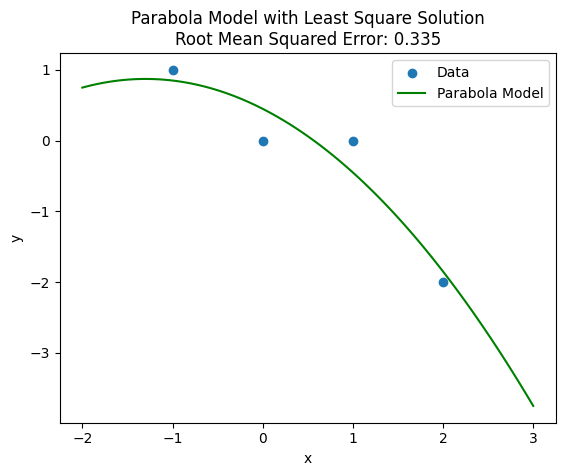

In [16]:
# AI usage: initial plotting block is doen with copilot

# Calculate the predicted values
y_pred = c[0] + c[1] * data[:, 0] + c[2] * data[:, 0]**2

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((data[:, 1] - y_pred)**2))

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], label='Data')

# Plot the parabola model
x = np.linspace(-2, 3, 100)
y = c[0] + c[1] * x + c[2] * x**2
plt.plot(x, y, color='green', label='Parabola Model')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Parabola Model with Least Square Solution\nRoot Mean Squared Error: {rmse:.3g}')

# Show legend
plt.legend()

# Show the plot
plt.show()


#### Choosing nonlinear model functions

**Example** (Sauer (2017) p. 209)

Fit the recorded temperatures in Washington, D.C., on January 1, 2001, as listed in
the following table, to a periodic model:

| time of day | $t$ | temp $(\mathrm{C})$ |
| :---: | :---: | :---: |
| 12 mid. | 0 | -2.2 |
| 3 am | $\frac{1}{8}$ | -2.8 |
| $6 \mathrm{am}$ | $\frac{1}{4}$ | -6.1 |
| $9 \mathrm{am}$ | $\frac{3}{8}$ | -3.9 |
| 12 noon | $\frac{1}{2}$ | 0.0 |
| $3 \mathrm{pm}$ | $\frac{5}{8}$ | 1.1 |
| $6 \mathrm{pm}$ | $\frac{3}{4}$ | -0.6 |
| $9 \mathrm{pm}$ | $\frac{7}{8}$ | -1.1 |

1. Choose the model
   - $y=c_1+c_2 \cos 2 \pi t+c_3 \sin 2 \pi t$
2. Force the model to fit the data: Write out $Ax=b$
   - Be clear about settings. 
3. Solve normal equation.

**Settings/Notations** (A subtask in Step 2)

- Settings
  - $m$: (usually) No. observations $\longrightarrow$ $b$
  - $n$: d.o.f. (dimension of solution) $\longrightarrow$ $x$
  - $m\times n$: coefficent matrix $\longrightarrow$ $A$

| Generic LS | Our problem | Shape (math-oriented, not Python) |
|---|---|---|
| $x$ | $[c_1, c_2, c_3]$ <br> (Unknown/Solution vector) | $n\times 1$ ($n=3$) |
| $A$ | $1$, $\cos(2\pi t_i)$, $\sin(2\pi t_i)$ <br> (coefficents matrix) | $m\times n$ ($m=4$, $n=3$) | 
| $b$ | $y_i$ <br> (r.h.s. vector) | $m\times 1$ ($m=4$) |

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# number of data points/observations
m = 8

# data 
temp = np.array([-2.2, -2.8, -6.1, -3.9, 0., 1.1, -0.6, -1.1])
t = np.arange(m)*(1./m)

# vector of unknowns (model 2)
n = 3
c = np.zeros(n)

# matrix of least squares (model 2)
A = np.zeros((m, n))
ones = np.ones(m)
A = np.column_stack((ones, np.cos(2*np.pi*t), np.sin(2*np.pi*t)))

# vector of observations
b = temp

# least squares solution (model 2)
c = np.linalg.solve(A.T @ A, A.T @ b)

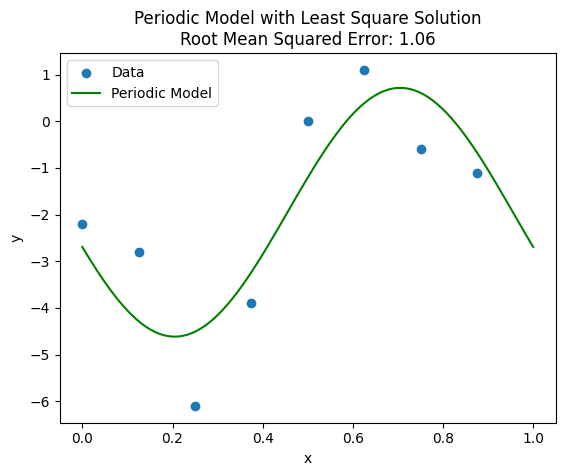

In [18]:
# AI usage: initial plotting block is doen with copilot

# Calculate the predicted values
y_pred = A @ c

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((b - y_pred)**2))

# Plot the data points
plt.scatter(t, b, label='Data')

# Plot the model
x = np.linspace(0, 1, 100)
y = c[0] + c[1] * np.cos(2*np.pi*x) + c[2] *  np.sin(2*np.pi*x)
plt.plot(x, y, color='green', label='Periodic Model')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Periodic Model with Least Square Solution\nRoot Mean Squared Error: {rmse:.3g}')

# Show legend
plt.legend()

# Show the plot
plt.show()


#### Data linearization

**Example** (Sauer (2017) p. 212)

Use model linearization to find the best least squares exponential fit $y = c_1 e^{c_2 t}$ to the
following world automobile supply data:

| year | cars $\left(\times 10^6\right)$ |
| :---: | :---: |
| 1950 | 53.05 |
| 1955 | 73.04 |
| 1960 | 98.31 |
| 1965 | 139.78 |
| 1970 | 193.48 |
| 1975 | 260.20 |
| 1980 | 320.39 |

**Remark** (Data linearization)

- Exponential growth is a reasonable model for population.
  - The more individuals are, the more new born individuals will be (at least for a short term).
  - That is, the rate of change of the population is proportional to the population itself. And exponential function has this property.
- "Force the model to fit the data" does not work: It results in a nonlinear equations.
  - Direction 1: Take nonlinear least square problem.
  - Direction 2: (Data linearization) Change the problem to obtain linear equations.
    - In the current example, take logarithm. 

Step 1: Take a transformation and rename quantities approprately to obtain a linear problem.

$$
\begin{split}
\ln y &=\ln \left(c_1 e^{c_2 t}\right)=\ln c_1+c_2 t = k +c_2 t
\\
k &= \ln c_1
\end{split}
$$

- new unknown vector: $[k, c_2]$
- new data: $\ln(\text{cars})$

Step 2: Solve normal equation

Step 3: Check the result with $c_1= e^k$ and $c_2$ in the setting before transformation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# number of data points/observations
m = 7
y = np.array([53.05, 73.04, 98.31, 139.78, 193.48, 260.20, 320.39])
# 1950 is treated as 0
t = np.arange(m)*5.

# vector of unknowns
c = np.zeros(2)

# matrix of least squares
A = np.column_stack((np.ones(m), t))

# vector of observations
b = np.log(y)

# least squares solution
c = np.linalg.solve(A.T @ A, A.T @ b)

# invert the transoformation for c_1
c[0] = np.exp(c[0])


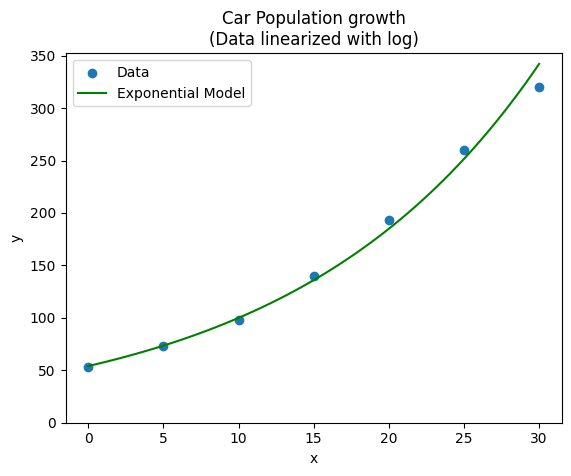

In [2]:
# AI usage: initial plotting block is doen with copilot

# Calculate the predicted values
y_pred = c[0]*np.exp(c[1]*t)

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((b - y_pred)**2))

# Plot the data points
plt.scatter(t, y, label='Data')

# Plot the model
x = np.linspace(t[0], t[-1], 100)
y_ = c[0]*np.exp(c[1]*x)
plt.plot(x, y_, color='green', label='Exponential Model')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Car Population growth\n(Data linearized with log)')
plt.ylim(0, np.max(y)*1.1)

# Show legend
plt.legend()

# Show the plot
plt.show()


**NOTE: NOT TRUE LEAST SQUARES SOLUTION**  
**WOULD REQUIRE MORE COMPLICATED NON-LINEAR LESAT SQUARES**

**Remark** (Consequence of data linearization)

- Model linearization changes the least squares problem. 
  - The solution minimize the RMSE with respect to the linearized problem, not the original problem.
    - Original problem: minimize $\left(c_1 e^{c_2 t_1}-y_1\right)^2+\cdots+\left(c_1 e^{c_2 t_m}-y_m\right)^2$ over $[c_1, c_2]\in\mathbb{R}^2$.
    - Linearized problem: minimize $\left(\ln c_1+c_2 t_1-\ln y_1\right)^2+\cdots+\left(\ln c_1+c_2 t_m-\ln y_m\right)^2$ over $[c_1, c_2]\in\mathbb{R}^2$.
  - The solutions of these two are different in general.
  - This means, clear meaning of the solution is no longer available: It mimimizes something (i.e., a distorted distance), but we are not sure whether that quantity is the best quantity to minimize. 
- The answer to which method is "correct" depends on the context of the data. 
  - To answer the question, the user needs to decide which errors are most important to minimize. (Sauer (2017) p. 212)

**Remark** (HW hint)

What if the model is $c_1 t e^{c_2 t}$? 

| | |
|---|---|
| Drug concentration | ![Drug concentration](https://clinicalinfo.hiv.gov/sites/default/files/glossaries/images/Pharmacokinetics-800.jpg) |

Figure: Clinical Info HIV.gov (Drug concentration)

### What to be careful of

#### Conditioning of normal equation

# WHAT IS CONDITION NUMBER

**Remark**

- The condition number $\mathrm{cond}(A^T A)$ is approximately the square of the original $\mathrm{cond}(A)$ (Sauer (2017) p. 204)

**Example** (ill-conditioned least square problem) Sauer 2017)

Let $x_0=2.0, x_2=2.2, x_3=2.4, \ldots, x_{10}=4.0$ be equally spaced points in $[2,4]$, and set $y_i=1+x_i+x_i^2+x_i^3+x_i^4+x_i^5+x_i^6+x_i^7$ for $0 \leq i \leq 10$. Use the normal equations to find the least squares polynomial $P(x)=c_1+c_2 x+\cdots+c_8 x^7$ fitting the $\left(x_i, y_i\right)$.

###### Model answer

1. Choose a model $\longrightarrow$ dimension and meaning of $c$

Find best solution among the following (model) with $c=(c_0, \cdots, c_7)\in\mathbb{R}^8$

$$
P(x)=c_0+c_1 x+\cdots+c_7 x^7
$$

2. Force the model to fit the data $\longrightarrow$ $Ac=y$ 

$$
\left[\begin{array}{ccccc}
1 & x_0 & x_0^2 & \cdots & x_0^7 \\
1 & x_1 & x_1^2 & \cdots & x_1^7 \\
\vdots & \vdots & \vdots & & \vdots \\
1 & x_{10} & x_{10}^2 & \cdots & x_{10}^7
\end{array}\right]\left[\begin{array}{c}
c_0 \\
c_1 \\
\vdots \\
c_7
\end{array}\right]=\left[\begin{array}{c}
y_0 \\
y_1 \\
\vdots \\
y_{10}
\end{array}\right]
$$

where $x_0=2.0, x_2=2.2, x_3=2.4, \ldots, x_{10}=4.0$ and 

$$
y_i=1+x_i+x_i^2+x_i^3+x_i^4+x_i^5+x_i^6+x_i^7 \quad (i\in\{0,1,\cdots,10\})
$$


3. Solve the normal equation $\longrightarrow$ compute $x$ such that $A^T Ax = A^T b$

Use package

4. Diagnostics $\longrightarrow$ plots and statistics

Compare with the true solution since it is known in this case.

In [1]:
import numpy as np
from internallib import poly_eval

# problem parameters
# Suggestions: To check sanity, set n = 2, 3, 4, 
#   Things get wild soon after n = 5
n = 8       # number of unknowns

# right-hand side vector
x = np.linspace(2., 4., 11)
c_true = np.ones(n)
y = poly_eval(c_true, x)

# matrix
pow = np.arange(n)
# A = x[:, np.newaxis] ** pow       # broadcasting in effect
A = x.reshape(-1, 1) ** pow         # equivalent to the previous line

# vector of unknowns
c = np.zeros(n)

# least squares solution (model 1 and 2)
c = np.linalg.solve(A.T @ A, A.T @ y)

ModuleNotFoundError: No module named 'internallib'

In [ ]:
with np.printoptions(precision=2, suppress=True):
    print(f"{'c_true':<10}{': '}{c_true}")
    print(f"{'c':<10}{': '}{c}")
    print(f"{'x':<10}{': '}{x}")
    print(f"{'y':<10}{': '}{y}")

###### Remark

**Remark** 

- This motivates QR factorization, which finds the least square solution with better conditioning. 

### Appendix

##### Important preliminary

- Projections (Linear algebra)
- Gradient of vector field (Vector calculus 1)

**Remark**

- (1st index matching requirement on $A$ and $b$) The number of rows of $A$ and the lenth of $b$ must match. 
- The number of columns of $A$ must match the length of the solution $x$.


---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)